# Hoops Data Analysis

## Project Plan
Use a couple models of machine learning to see if there is a corralation between the stats a player produces and the salary that they are earning. The models will attempt to predict player salaries based on there statistics. If the models can get close to predicting the salary then we know that there is a corralation between stats and salary. If not then we know that other factors that arn't recorded such as leadership, mentality, and actions off the court must play a significant role in a players salary. The research questions will help create a model that will more accuratly predict player salarys. 

## Research Questions

#### Main
What stats cause the players value to increase the most?

#### Related 1
What positions are the most expensive? Least expensive?

#### Related 2
Does the team a player plays for have a corralation to the amout of money that they make?

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#step 2 - loading salary data

dfStats = pd.read_csv("Salary.csv")
dfStats

,First,Last,Salary
0,Stephen,Curry,45780966.0
1,James,Harden,44310840.0
2,John,Wall,44310840.0
3,Russell,Westbrook,44211146.0
4,Kevin,Durant,42018900.0
...,...,...,...
648,Anthony,Barber,53176.0
649,Luca,Vildoza,42789.0
650,Zavier,Simpson,37223.0
651,Mfiondu,Kabengele,19186.0


In [3]:
#step 2 - loading player stats data

dfPlayer = pd.read_csv("playerStats2021.csv", encoding="latin1", delimiter= ";")
dfPlayer

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [4]:
#step 2 -combining data to one csv file

# creating a common column to join by
dfStats['Player'] = dfStats['First'] + " " + dfStats['Last']

# Merge DataFrames on a common column
dfCombined = pd.merge(dfStats, dfPlayer, on='Player', how='inner')

# Handle duplicates or missing values if necessary
dfCombined.drop_duplicates(subset=['First', 'Last', 'Salary'], inplace=True)  # Drop duplicate rows
dfCombined.dropna(inplace=True)  # Drop rows with missing values

# drop new row
dfCombined.drop(columns=['Player'], inplace=True)
dfCombined

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen,Curry,45780966.0,126,PG,33,GSW,64,64,34.5,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
1,James,Harden,44310840.0,218,PG-SG,32,TOT,65,65,37.2,...,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
4,Russell,Westbrook,44211146.0,576,PG,33,LAL,78,78,34.3,...,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
5,Kevin,Durant,42018900.0,154,PF,33,BRK,55,55,37.2,...,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
6,LeBron,James,41180544.0,274,SF,37,LAL,56,56,37.2,...,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Micah,Potter,53176.0,456,C,23,DET,3,0,10.3,...,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,Trayvon,Palmer,53176.0,434,SG,27,DET,1,0,17.0,...,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,Tre,Scott,53176.0,494,SF,25,CLE,2,0,5.5,...,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,Zavier,Simpson,37223.0,505,PG,24,OKC,4,4,43.5,...,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


#### Step 4
The dataset is a combined dataset containing 2021 NBA player statistics and 2021 NBA player Salary. It includes 528 players, each has 32 columns of data. The data consists of name, age, team, salary and all offensive and defensive stats. The data has already been cleaned and contains no missing values or duplicate rows. There are no outliers in this data but even if there was I wouldn't want to remove them becasue, it is important to keep any players that put up alot of stats but wern't getting paid a ton. Similarly I want to keep data of players that may have been getting paid a ton but didn't record many stats.

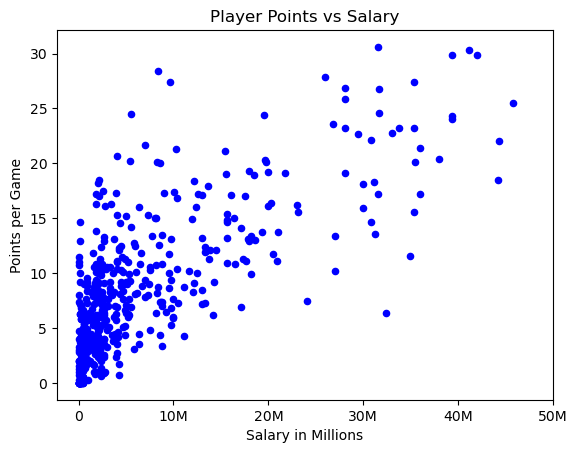

In [5]:
#step4

# look at points and salary
dfCombined.plot.scatter(x='Salary', y='PTS', color='blue')

# Add labels and title
plt.xlabel('Salary in Millions')
plt.ylabel('Points per Game')
plt.title('Player Points vs Salary')
# Set custom x-axis ticks
plt.xticks([0, 10000000, 20000000, 30000000, 40000000, 50000000], ['0', '10M', '20M', '30M', '40M', '50M'])


plt.show()

The graph above is showing a the relationship between salary and the average points a player scores in a game. By viewing the scatter plot you can see a general patter of as the salary increases so does the avg amount of points a player scores. This shows a slight corralation but doesn't prove that they are directly related because there are many stats that may show similar corralation that play a role in a players salary.

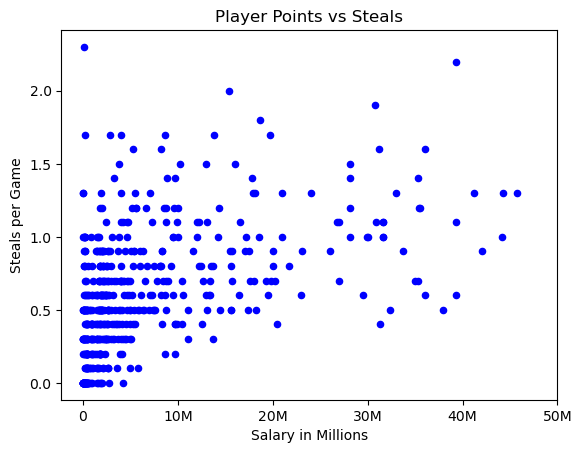

In [6]:
#step4

# look at points and steals
dfCombined.plot.scatter(x='Salary', y='STL', color='blue')

# Add labels and title
plt.xlabel('Salary in Millions')
plt.ylabel('Steals per Game')
plt.title('Player Points vs Steals')
# Set custom x-axis ticks
plt.xticks([0, 10000000, 20000000, 30000000, 40000000, 50000000], ['0', '10M', '20M', '30M', '40M', '50M'])


plt.show()

The graph above is comparing steals to salary. By looking at the scatter plot we can't see much of a trend. We see a super wide range of players that get the same amount of steels that range in salary greatly. For example we see a player earning almost 40M getting less steals than a player earning far less than 10M

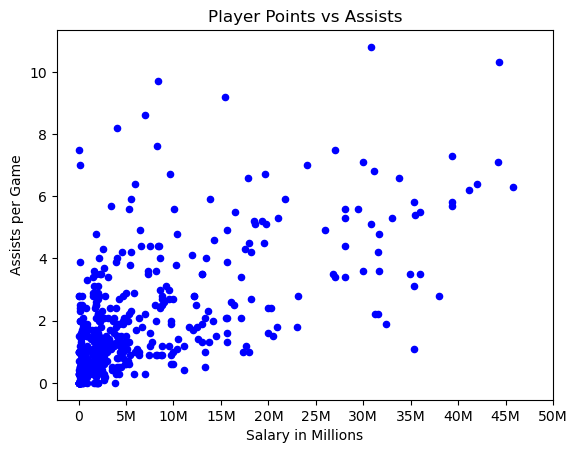

In [7]:
#step4

# look at points and assists
dfCombined.plot.scatter(x='Salary', y='AST', color='blue')

# Add labels and title
plt.xlabel('Salary in Millions')
plt.ylabel('Assists per Game')
plt.title('Player Points vs Assists')
# Set custom x-axis ticks
plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000], ['0', '5M', '10M', '15M', '20M', '25M', '30M', '35M', '40M', '45M', '50M'])


plt.show()

The graph is comparing the average number of assists that a player gets per game to their salary. Just by looking at the scatter plot above we can see a slight upward trend showing that greater assists leaders to a greater salary. However the trend in the scatter plot isn't strong enough to say that there is a solid corralation between assists and salary. There is many players that are averaging 4-6 assists per game that are making between 2.5M and 40M. That range in salary is too large to see a solid corralation.

In [8]:
# create a table that shows the corralation between each of the columns selected.
# only columns that are a number can be calculated
corr = dfCombined[['Salary', 'PTS', 'AST', 'TRB', 'TOV', 'FT', 'FG', 'G', 'GS', 'MP', 'STL', 'BLK']].corr()
corr

,Salary,PTS,AST,TRB,TOV,FT,FG,G,GS,MP,STL,BLK
Salary,1.000000,0.746419,0.634186,0.541538,0.671572,0.710019,0.729347,0.393109,0.601542,0.641937,0.490756,0.327863
PTS,0.746419,1.000000,0.743830,0.655774,0.836452,0.887652,0.991771,0.583034,0.753232,0.884920,0.626051,0.380380
AST,0.634186,0.743830,1.000000,0.418766,0.863230,0.671871,0.730498,0.422904,0.602990,0.736443,0.699717,0.162573
TRB,0.541538,0.655774,0.418766,1.000000,0.590103,0.613833,0.686651,0.541564,0.647320,0.699686,0.465836,0.715750
TOV,0.671572,0.836452,0.863230,0.590103,1.000000,0.782990,0.827427,0.434563,0.643968,0.782298,0.671552,0.318752
FT,0.710019,0.887652,0.671871,0.613833,0.782990,1.000000,0.850872,0.443806,0.633416,0.711175,0.505727,0.362905
FG,0.729347,0.991771,0.730498,0.686651,0.827427,0.850872,1.000000,0.584406,0.757583,0.886882,0.623835,0.415232
G,0.393109,0.583034,0.422904,0.541564,0.434563,0.443806,0.584406,1.000000,0.664130,0.669563,0.463552,0.328646
GS,0.601542,0.753232,0.602990,0.647320,0.643968,0.633416,0.757583,0.664130,1.000000,0.792085,0.564527,0.400612
MP,0.641937,0.884920,0.736443,0.699686,0.782298,0.711175,0.886882,0.669563,0.792085,1.000000,0.720167,0.440442


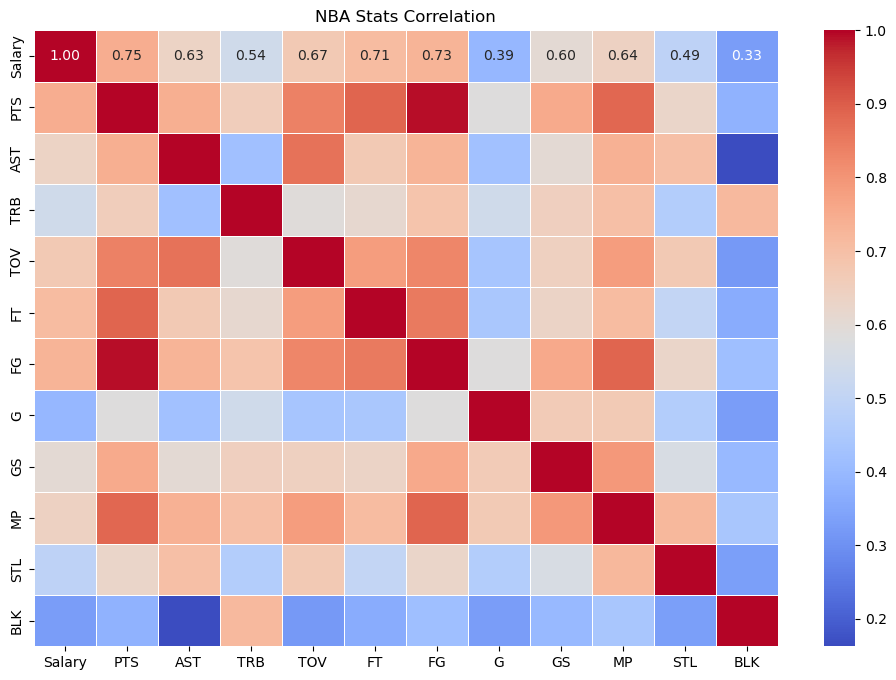

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('NBA Stats Correlation')
plt.show()

The table and graph above are represenative of the corralation of some of the most popular stats recorded for NBA player. The stats include, points per game, assists per game, rebounds, turn overs and a few other of the most popular stats. I mainly want to see what stats are corralated but I want to focus on comparing stats to salary. Whats stats lead to the greatest salary. Columns such as PTS, AST, FT all have the highest corralation to salary. Something to note is that these are all offensive stats. As we can see in the graph devensive stats such as BLK and STL have a low coralation to salary.